In [1]:
import string
import copy
import scipy
import Tkinter, tkFileDialog
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import sys
import datetime
import matplotlib.units
import re
from numba import jit,int32
import time
sys.path.append(os.path.abspath("C:\Users\Scherer Lab E\Documents\GitHub\Python_Data_Analysis"))
import common_functions
import matplotlib_helper_functions as mpl_help

C:\Users\Scherer Lab E\Anaconda2\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [2]:
import cPickle
f = open("Data/Ana_16041501_spiff_results.pkl", 'r')
tracked_data, en_msd, corr_tracked_data, corr_en_msd = cPickle.load(f)
f.close()

In [13]:
matplotlib.rcParams['figure.dpi'] = 200.0
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['axes.titlesize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 'large'
matplotlib.rcParams['ytick.labelsize'] = 'large'

# Replacement Figure 2 SPIFF

4.83442578536


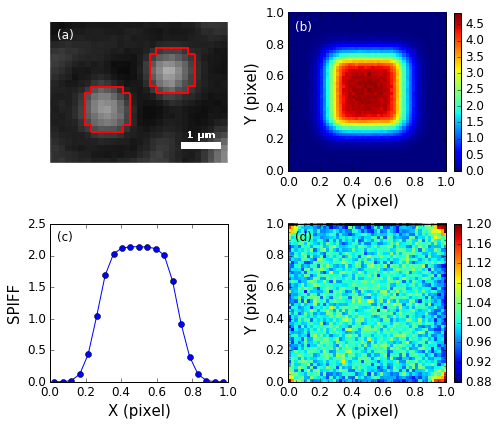

In [16]:
fig_2_replacement = plt.figure(figsize=[7,6])

from mpl_toolkits.axes_grid1 import make_axes_locatable

ax1 = plt.subplot(221)
pair_im = plt.imread('Figs\Particle_pair_with_window.png')
plt.imshow(pair_im, interpolation='none')
ax1.set_axis_off()


df, window = tracked_data[0]
#fig_spiff_win7 = plt.figure(figsize=[4,3.5])
ax2 = plt.subplot(222)
hist_out = plt.hist2d((df['x']+0.5)%1, (df['y']+0.5)%1, bins=50, normed=True, range=[[0,1],[0,1]], rasterized=True)
ax2.axis([0, 1, 0, 1])
ax2.set_aspect('equal')
plt.ylabel('Y (pixel)')
plt.xlabel('X (pixel)')
print np.max(hist_out[0])
plt.minorticks_on()
divider = make_axes_locatable(ax2)
cbar = divider.append_axes("right", size="5%", pad=0.1)#plt.colorbar()
plt.colorbar(cax=cbar)


ax3 = plt.subplot(223)
hist, bin_edges = np.histogram((df['x']+0.5)%1, bins=21, normed=True)
midpoints = (bin_edges[:-1] + bin_edges[1:])/2.0
#fig_spiff_x_win7 = plt.figure(figsize=[4,3.5])
plt.plot(midpoints, hist, '-ob')
plt.xlabel('X (pixel)')
plt.ylabel('SPIFF')



ax4 = plt.subplot(224)
df, window = corr_tracked_data[0]
plt.hist2d((df['x']+0.5)%1, (df['y']+0.5)%1, bins=50, normed=True, rasterized=True)#, cmax=1.25)
plt.clim(0.88,1.2)
plt.axis('equal')
plt.ylabel('Y (pixel)')
plt.xlabel('X (pixel)')
plt.minorticks_on()
ax4.axis([0, 1, 0, 1])
ax4.set_aspect('equal')
divider = make_axes_locatable(ax4)
cbar = divider.append_axes("right", size="5%", pad=0.1)#plt.colorbar()
plt.colorbar(cax=cbar)


plt.tight_layout()

ax2.axis([0, 1, 0, 1])
ax2.set(adjustable='box-forced', aspect='equal')
ax4.axis([0, 1, 0, 1])
ax4.set(adjustable='box-forced', aspect='equal')

mpl_help.add_axes_label_inches(ax1, (0.1,0.1), '(a)', fontdict={'fontsize':12, 'color':'white'})
mpl_help.add_axes_label_inches(ax2, (0.1,0.1), '(b)', fontdict={'fontsize':12, 'color':'white'})
mpl_help.add_axes_label_inches(ax3, (0.1,0.1), '(c)', fontdict={'fontsize':12})
mpl_help.add_axes_label_inches(ax4, (0.1,0.1), '(d)', fontdict={'fontsize':12})#, 'color':'white'})

plt.show()

In [19]:
fig_2_replacement.savefig("Figs\Fig_2_replacement.png", dpi=800)
save_dir = "C:\Users\Scherer Lab E\Box Sync\Thesis\SPIFF"
fig_2_replacement.savefig(save_dir+"\spiff_Fig_2.pdf", dpi=600)

# Supplemental Figures

In [8]:
len_msd

293

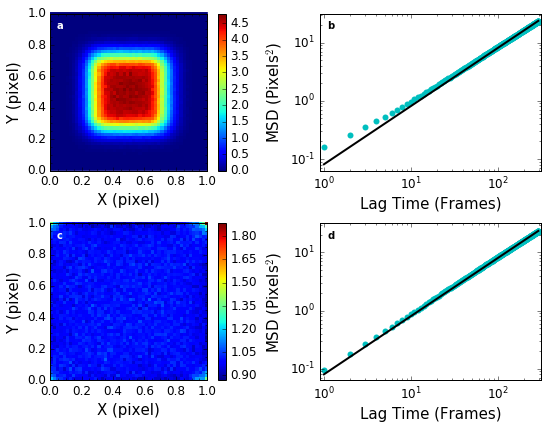

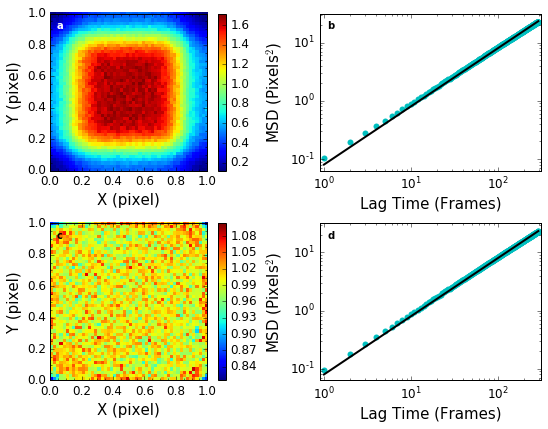

In [21]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

for num, entry in enumerate(corr_tracked_data[:2]):
    df, window = tracked_data[num]
    spiff_corr_msd = plt.figure(figsize=[8,6])
    ax1 = plt.subplot(221)
    plt.hist2d((df['x']+0.5)%1, (df['y']+0.5)%1, bins=50, normed=True, rasterized=True)
    plt.axis('equal')
    ax1.axis([0, 1, 0, 1])
    ax1.set_aspect('equal')
    cbar = plt.colorbar()
    plt.minorticks_on()
    plt.ylabel('Y (pixel)')
    plt.xlabel('X (pixel)')
    
    len_msd = len(en_msd[num][0])+1
    ax2 = plt.subplot(222)
    plt.plot(range(1,len_msd), en_msd[num][0], 'oc', markeredgewidth=0)
    pwr_law = lambda x, param: param*x
    fit_params = scipy.optimize.curve_fit(pwr_law, np.arange(1,len_msd)[-200:], en_msd[num][0][-200:])
    plt.plot(np.arange(1,len_msd), pwr_law(np.arange(1,len_msd), fit_params[0][0]), 'k', lw=2)
    plt.ylim(10**(-1.2), 10**(1.5))
    plt.xlim(0.9, 10**(2.5))
    plt.loglog()
    plt.ylabel('MSD (Pixels$^2$)')
    plt.xlabel('Lag Time (Frames)')
    
#     inset_trans_axes = [1.2, 1.0]
    
#     ax2_inset = inset_axes(ax2, inset_trans_axes[0], inset_trans_axes[1], loc=4, borderpad=0.5)
#     ax2_inset.plot(range(1,len_msd), en_msd[num][0], 'oc', markeredgewidth=0)
#     ax2_inset.plot(np.arange(1,len_msd), pwr_law(np.arange(1,len_msd), fit_params[0][0]), 'k', lw=2)
#     ax2_inset.loglog()
#     plt.ylim(10**(-1.2), 0.8)
#     plt.xlim(0.9, 8)
#     plt.xticks(visible=False)
#     plt.yticks(visible=False)
    
#     mark_inset(ax2, ax2_inset, loc1=2, loc2=4, fc='none', ec='0.5')
    
    df, window = entry
    ax3 = plt.subplot(223)
    plt.hist2d((df['x']+0.5)%1, (df['y']+0.5)%1, bins=50, normed=True, rasterized=True)
    plt.axis('equal')
    ax3.axis([0, 1, 0, 1])
    ax3.set_aspect('equal')
    cbar = plt.colorbar()
    plt.minorticks_on()
    plt.ylabel('Y (pixel)')
    plt.xlabel('X (pixel)')
    
    
    len_msd = len(corr_en_msd[num][0])+1
    ax4 = plt.subplot(224)
    plt.plot(range(1,len_msd), corr_en_msd[num][0], 'oc', markeredgewidth=0)
    pwr_law = lambda x, param: param*x
    fit_params = scipy.optimize.curve_fit(pwr_law, np.arange(1,len_msd)[-200:], corr_en_msd[num][0][-200:])
    plt.plot(np.arange(1,len_msd), pwr_law(np.arange(1,len_msd), fit_params[0][0]), 'k', lw=2)
    plt.ylim(10**(-1.2), 10**(1.5))
    plt.xlim(0.9, 10**(2.5))
    plt.loglog()
    plt.ylabel('MSD (Pixels$^2$)')
    plt.xlabel('Lag Time (Frames)')
    
#     ax4_inset = inset_axes(ax4, inset_trans_axes[0], inset_trans_axes[1], loc=4, borderpad=0.5)
#     ax4_inset.plot(range(1,len_msd), corr_en_msd[num][0], 'oc', markeredgewidth=0)
#     ax4_inset.plot(np.arange(1,len_msd), pwr_law(np.arange(1,len_msd), fit_params[0][0]), 'k', lw=2)
#     ax4_inset.loglog()
#     plt.ylim(10**(-1.2), 0.8)
#     plt.xlim(0.9, 8)
#     plt.xticks(visible=False)
#     plt.yticks(visible=False)
    
#     mark_inset(ax4, ax4_inset, loc1=2, loc2=4, fc='none', ec='0.5')
    
    plt.tight_layout()

    ax1.axis([0, 1, 0, 1])
    ax1.set(adjustable='box-forced', aspect='equal')
    ax3.axis([0, 1, 0, 1])
    ax3.set(adjustable='box-forced', aspect='equal')
    
    mpl_help.add_axes_label_inches(ax1, (0.1,0.1), 'a', fontdict={'weight':'bold', 'color':'white'})
    mpl_help.add_axes_label_inches(ax2, (0.1,0.1), 'b', fontdict={'weight':'bold'})
    if num == 1:
        mpl_help.add_axes_label_inches(ax3, (0.1,0.1), 'c', fontdict={'weight':'bold'})
    else:
        mpl_help.add_axes_label_inches(ax3, (0.1,0.1), 'c', fontdict={'weight':'bold', 'color':'white'})
    mpl_help.add_axes_label_inches(ax4, (0.1,0.1), 'd', fontdict={'weight':'bold'})
    
    #spiff_corr_msd.savefig('Figs\Supp_spiff_corr_msd_'+str(num)+'.png', dpi=800)
    save_dir = "C:\Users\Scherer Lab E\Box Sync\Thesis\SPIFF"
    spiff_corr_msd.savefig(save_dir+'\Supp_spiff_corr_msd_'+str(num)+'.pdf', dpi=600)

In [39]:
test = tracked_data[0][0]
num_part = len(test[test.frame==0])
part_area = 1.56*np.pi
camera_area = 350*2560*6.5/40.0
tot_part_area = part_area*num_part
fraction = tot_part_area/camera_area
fraction

0.14164094878184838